In [286]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import robust_scale
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn import datasets, linear_model
import scipy.stats as stats
import statistics

>Question 1
>
·         Programmatically download and load into your favorite analytical tool the trip data for September 2015.
>
·         Report how many rows and columns of data you have loaded.

In [211]:
df = pd.read_csv('green_tripdata_2015-09.csv')
df.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,2015-09-01 00:02:34,2015-09-01 00:02:38,N,5,-73.979485,40.684956,-73.979431,40.685020,1,...,7.8,0.0,0.0,1.95,0.0,NaN,0.0,9.75,1,2.0
1,2,2015-09-01 00:04:20,2015-09-01 00:04:24,N,5,-74.010796,40.912216,-74.010780,40.912212,1,...,45.0,0.0,0.0,0.00,0.0,NaN,0.0,45.00,1,2.0
2,2,2015-09-01 00:01:50,2015-09-01 00:04:24,N,1,-73.921410,40.766708,-73.914413,40.764687,1,...,4.0,0.5,0.5,0.50,0.0,NaN,0.3,5.80,1,1.0
3,2,2015-09-01 00:02:36,2015-09-01 00:06:42,N,1,-73.921387,40.766678,-73.931427,40.771584,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0
4,2,2015-09-01 00:00:14,2015-09-01 00:04:20,N,1,-73.955482,40.714046,-73.944412,40.714729,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0


In [212]:
df.columns

Index(['VendorID', 'lpep_pickup_datetime', 'Lpep_dropoff_datetime',
       'Store_and_fwd_flag', 'RateCodeID', 'Pickup_longitude',
       'Pickup_latitude', 'Dropoff_longitude', 'Dropoff_latitude',
       'Passenger_count', 'Trip_distance', 'Fare_amount', 'Extra', 'MTA_tax',
       'Tip_amount', 'Tolls_amount', 'Ehail_fee', 'improvement_surcharge',
       'Total_amount', 'Payment_type', 'Trip_type '],
      dtype='object')

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494926 entries, 0 to 1494925
Data columns (total 21 columns):
VendorID                 1494926 non-null int64
lpep_pickup_datetime     1494926 non-null object
Lpep_dropoff_datetime    1494926 non-null object
Store_and_fwd_flag       1494926 non-null object
RateCodeID               1494926 non-null int64
Pickup_longitude         1494926 non-null float64
Pickup_latitude          1494926 non-null float64
Dropoff_longitude        1494926 non-null float64
Dropoff_latitude         1494926 non-null float64
Passenger_count          1494926 non-null int64
Trip_distance            1494926 non-null float64
Fare_amount              1494926 non-null float64
Extra                    1494926 non-null float64
MTA_tax                  1494926 non-null float64
Tip_amount               1494926 non-null float64
Tolls_amount             1494926 non-null float64
Ehail_fee                0 non-null float64
improvement_surcharge    1494926 non-null float64
To

In [214]:
df.describe()

/Users/akhileshgotmare/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


,VendorID,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
count,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,0.0,1.494926e+06,1.494926e+06,1.494926e+06,1.494922e+06
mean,1.782045e+00,1.097653e+00,-7.383084e+01,4.069114e+01,-7.383728e+01,4.069291e+01,1.370598e+00,2.968141e+00,1.254320e+01,3.512800e-01,4.866408e-01,1.235727e+00,1.231047e-01,NaN,2.920991e-01,1.503215e+01,1.540559e+00,1.022353e+00
std,4.128570e-01,6.359437e-01,2.776082e+00,1.530882e+00,2.677911e+00,1.476698e+00,1.039426e+00,3.076621e+00,1.008278e+01,3.663096e-01,8.504473e-02,2.431476e+00,8.910137e-01,NaN,5.074009e-02,1.155316e+01,5.232935e-01,1.478288e-01
min,1.000000e+00,1.000000e+00,-8.331908e+01,0.000000e+00,-8.342784e+01,0.000000e+00,0.000000e+00,0.000000e+00,-4.750000e+02,-1.000000e+00,-5.000000e-01,-5.000000e+01,-1.529000e+01,NaN,-3.000000e-01,-4.750000e+02,1.000000e+00,1.000000e+00
25%,2.000000e+00,1.000000e+00,-7.395961e+01,4.069895e+01,-7.396782e+01,4.069878e+01,1.000000e+00,1.100000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,NaN,3.000000e-01,8.160000e+00,1.000000e+00,NaN
50%,2.000000e+00,1.000000e+00,-7.394536e+01,4.074674e+01,-7.394504e+01,4.074728e+01,1.000000e+00,1.980000e+00,9.500000e+00,5.000000e-01,5.000000e-01,0.000000e+00,0.000000e+00,NaN,3.000000e-01,1.176000e+01,2.000000e+00,NaN
75%,2.000000e+00,1.000000e+00,-7.391748e+01,4.080255e+01,-7.391013e+01,4.079015e+01,1.000000e+00,3.740000e+00,1.550000e+01,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,NaN,3.000000e-01,1.830000e+01,2.000000e+00,NaN
max,2.000000e+00,9.900000e+01,0.000000e+00,4.317726e+01,0.000000e+00,4.279934e+01,9.000000e+00,6.031000e+02,5.805000e+02,1.200000e+01,5.000000e-01,3.000000e+02,9.575000e+01,NaN,3.000000e-01,5.813000e+02,5.000000e+00,2.000000e+00


In [215]:
df.shape

(1494926, 21)

>Question 2
>
·         Plot a histogram of the number of the trip distance ("Trip Distance").
>
·         Report any structure you find and any hypotheses you have about that structure.

In [216]:
print(df['Trip_distance'].min(),df['Trip_distance'].max())


0.0 603.1


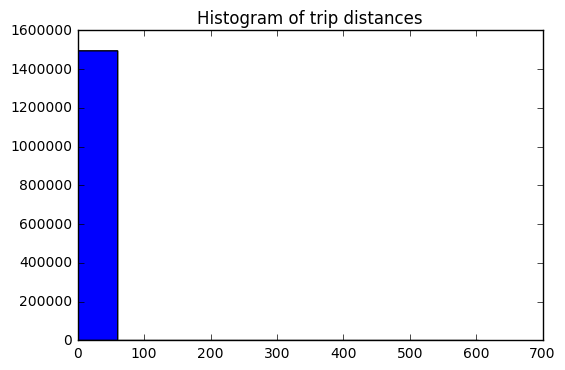

In [217]:
plt.hist(df['Trip_distance'])#,bins = 100)
plt.title('Histogram of trip distances')
plt.show()

In [218]:
df['Trip_distance'].nunique()

3210

In [219]:
df['Trip_distance'].value_counts().head()

0.0    20592
1.0    16735
0.9    16699
0.8    16152
1.1    16070
Name: Trip_distance, dtype: int64

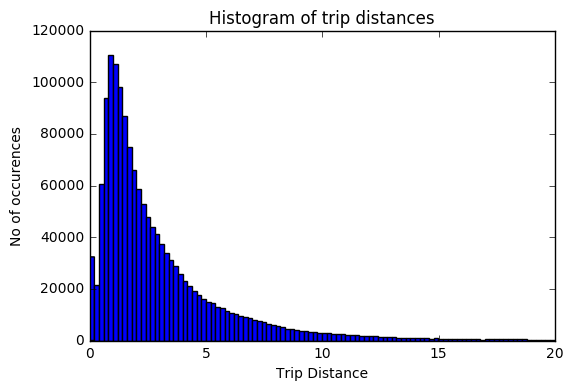

In [220]:
plt.hist(df['Trip_distance'][df['Trip_distance']<20],bins = 100)
plt.title('Histogram of trip distances')
plt.xlabel('Trip Distance')
plt.ylabel('No of occurences')
plt.show()

>Question 3
>
·         Report mean and median trip distance grouped by hour of day.
>
·         We'd like to get a rough sense of identifying trips that originate or terminate at one of the NYC area airports. Can you provide a count of how many transactions fit this criteria, the average fair, and any other interesting characteristics of these trips.

In [221]:
df['pickup'] = df['lpep_pickup_datetime'].apply(lambda x: 
                                                       datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

In [222]:
df['pickup_hour'] = df['pickup'].apply(lambda x: x.hour)

In [223]:
df['dropoff'] = df['Lpep_dropoff_datetime'].apply(lambda x: 
                                                       datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
df['dropoff_hour'] = df['dropoff'].apply(lambda x: x.hour)

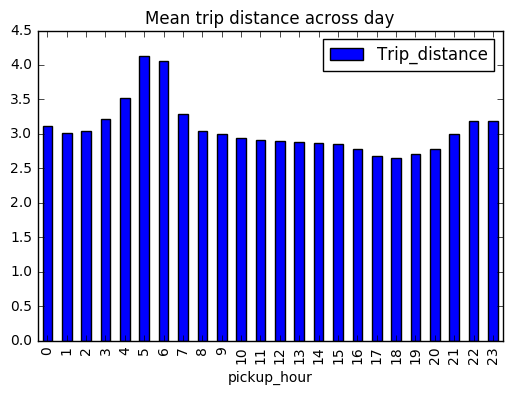

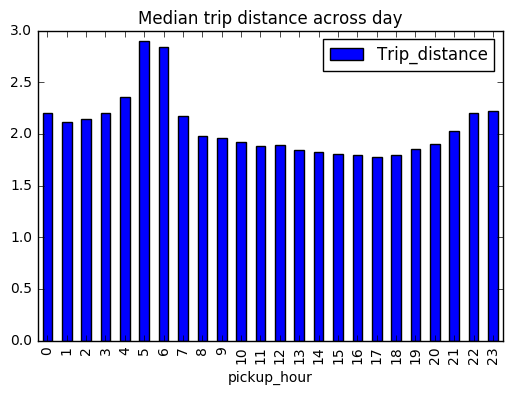

In [224]:
df[['Trip_distance','pickup_hour']].groupby('pickup_hour').mean().plot.bar()
plt.title('Mean trip distance across day')
plt.show()
df[['Trip_distance','pickup_hour']].groupby('pickup_hour').median().plot.bar()
plt.title('Median trip distance across day')
plt.show()

In [225]:
def which_nyairport(row):
    if (
        ((row['Pickup_longitude'] < -73.750296) & (row['Pickup_longitude'] > -73.821884) &
       (row['Pickup_latitude'] < 40.666467) & (row['Pickup_latitude']>40.646677)) | 
        (
       (row['Dropoff_longitude'] < -73.750296) & (row['Dropoff_longitude'] > -73.821884) &
       (row['Dropoff_latitude'] < 40.666467) & (row['Dropoff_latitude']>40.646677)) ):
        
        return 'JFK'
    if (
        ((row['Pickup_longitude'] < -73.865387) & (row['Pickup_longitude'] > -73.884547) &
       (row['Pickup_latitude'] < 40.773098) & (row['Pickup_latitude']>40.767550)) | 
        (
       (row['Dropoff_longitude'] < -73.865387) & (row['Dropoff_longitude'] > -73.884547) &
       (row['Dropoff_latitude'] < 40.773098) & (row['Dropoff_latitude']>40.767550)) ):
        
        return 'LAG'
    else:
        return 'NOT'
    

In [226]:
ls

Green_Cabs.ipynb            green_tripdata_2015-09.csv
aiport_array.npy            green_tripdata_2016-01.csv
fhv_tripdata_2016-01.csv


In [227]:
airport = np.load('aiport_array.npy')

Cell below is commented since it takes too long to compute the airport array, which therefore is saved as a .npy file and loaded in the above cell.

In [228]:
# airport = [None]*df.shape[0]
# for index, row in df.iterrows():
#     if index%1000 == 0:
#         print(index)
#     airport[index] = which_nyairport(row)
# np.save('aiport_array.npy', airport)

In [229]:
df['airport'] = airport 

In [230]:
df['airport'].value_counts()

NOT    1485010
LAG       5216
JFK       4700
Name: airport, dtype: int64

average fair, no of trips satisying criteria, other interesting things

In [231]:
print('average fair for airport trips',df[df['airport']!= 'NOT']['Fare_amount'].mean())
print('number of trips satisfying the criteria:',df[df['airport']!='NOT']['Fare_amount'].shape[0])

average fair for airport trips 26.628824122630096
number of trips satisfying the criteria: 9916


In [232]:
print('average fair for non-airport trips',df[df['airport']=='NOT']['Fare_amount'].mean())

average fair for non-airport trips 12.449142207796637


>Question 4

>·         Build a derived variable for tip as a percentage of the total fare.

>·         Build a predictive model for tip as a percentage of the total fare. Use as much of the data as you like (or all of it). We will validate a sample.

In [233]:
df.columns

Index(['VendorID', 'lpep_pickup_datetime', 'Lpep_dropoff_datetime',
       'Store_and_fwd_flag', 'RateCodeID', 'Pickup_longitude',
       'Pickup_latitude', 'Dropoff_longitude', 'Dropoff_latitude',
       'Passenger_count', 'Trip_distance', 'Fare_amount', 'Extra', 'MTA_tax',
       'Tip_amount', 'Tolls_amount', 'Ehail_fee', 'improvement_surcharge',
       'Total_amount', 'Payment_type', 'Trip_type ', 'pickup', 'pickup_hour',
       'dropoff', 'dropoff_hour', 'airport'],
      dtype='object')

In [234]:
df['tip_percent'] = df['Tip_amount']/df['Fare_amount']
print((df['tip_percent']>1).value_counts())
df = df[df['tip_percent']<1]

False    1492331
True        2595
Name: tip_percent, dtype: int64


In [235]:
col_list = ['VendorID','Store_and_fwd_flag','RateCodeID','Passenger_count','Payment_type', 
            'Trip_type ', 'pickup_hour','airport',]
for col in col_list:
    print('---------------------','\n',col)
    print(df[col].value_counts())
    print(df[col].isnull().value_counts())

--------------------- 
 VendorID
2    1166745
1     321110
Name: VendorID, dtype: int64
False    1487855
Name: VendorID, dtype: int64
--------------------- 
 Store_and_fwd_flag
N    1479307
Y       8548
Name: Store_and_fwd_flag, dtype: int64
False    1487855
Name: Store_and_fwd_flag, dtype: int64
--------------------- 
 RateCodeID
1     1451328
5       30054
2        4411
3        1113
4         909
6          36
99          4
Name: RateCodeID, dtype: int64
False    1487855
Name: RateCodeID, dtype: int64
--------------------- 
 Passenger_count
1    1250095
2     114316
5      57789
3      33592
6      22051
4       9687
0        268
8         30
7         15
9         12
Name: Passenger_count, dtype: int64
False    1487855
Name: Passenger_count, dtype: int64
--------------------- 
 Payment_type
2    779997
1    698209
3      5260
4      4317
5        72
Name: Payment_type, dtype: int64
False    1487855
Name: Payment_type, dtype: int64
--------------------- 
 Trip_type 
1.0    1458264
2

From the results of the above cell we try to answer the question - 

>What features should be considered in the regression?

We decide to include the following - 
1. 'VendorID' (categorical)
2. 'Store_and_fwd_flag' (categorical)
3. 'Passenger_count' (numeric)
4. 'Trip_distance' (numeric)
5. 'Fare_amount' (numeric)
6. 'Extra' (numeric)
7. 'MTA_tax' (numeric)
8. 'Tolls_amount' (numeric)
9. 'improvement_surcharge'(numeric)
10. 'Payment_type' (categorical)
11. 'Trip_type ' (categorical)
12. 'pickup_hour' (categorical)
13. 'dropoff_hour' (categorical)
14. 'airport' (categorical)

And drop all other columns.

Currently our data resides in a DataFrame. But to deal with categorical values we would need to use the one-hot encoding process from the sklearn library which works only on numpy arrays, hence we convert the relevant columns to numpy arrays in further analysis and encode them to one-hot vectors.


In [236]:
df.dropna(subset = ['Trip_type '],inplace = True)

In [237]:
X_pre_encode = df['VendorID'].as_matrix()
le = preprocessing.LabelEncoder()
le.fit(X_pre_encode.reshape(X_pre_encode.shape[0],1))
ans = le.transform(X_pre_encode)

enc = OneHotEncoder()
enc.fit(ans.reshape(X_pre_encode.shape[0],1))
ans1 = enc.transform(ans.reshape(X_pre_encode.shape[0],1)).toarray()

X_pre_encode = df['Store_and_fwd_flag'].as_matrix()
le = preprocessing.LabelEncoder()
le.fit(X_pre_encode.reshape(X_pre_encode.shape[0],1))
ans = le.transform(X_pre_encode)

enc = OneHotEncoder()
enc.fit(ans.reshape(X_pre_encode.shape[0],1))
ans2 = enc.transform(ans.reshape(X_pre_encode.shape[0],1)).toarray()

X = np.c_[ans1,ans2]
print(X.shape)

/Users/akhileshgotmare/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/label.py:108: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/akhileshgotmare/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/label.py:108: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(1487851, 4)


In [238]:
X = np.c_[X , df['Passenger_count'].as_matrix(),df['Trip_distance'].as_matrix(),df['Fare_amount'].as_matrix(),
         df['Extra'].as_matrix(),df['MTA_tax'].as_matrix(),df['Tolls_amount'].as_matrix(),
         df['improvement_surcharge'].as_matrix()]

In [239]:
print(X.shape)

(1487851, 11)


In [240]:
for col in ['Payment_type','Trip_type ','pickup_hour','dropoff_hour','airport']:

    X_pre_encode = df[col].as_matrix()
    le = preprocessing.LabelEncoder()
    le.fit(X_pre_encode.reshape(X_pre_encode.shape[0],1))
    ans = le.transform(X_pre_encode)

    enc = OneHotEncoder()
    enc.fit(ans.reshape(X_pre_encode.shape[0],1))
    ans2 = enc.transform(ans.reshape(X_pre_encode.shape[0],1)).toarray()
    X = np.c_[X,ans2]

/Users/akhileshgotmare/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/label.py:108: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/akhileshgotmare/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/label.py:108: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/akhileshgotmare/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/label.py:108: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/akhileshgotmare/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/label.py:108: DataConversionWarning: A column-vector y was pass

In [241]:
X.shape

(1487851, 69)

In [242]:
y = df['tip_percent'].as_matrix()

In [243]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X, y)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(X) - y) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X, y))


Coefficients: 
 [ -1.61022847e+05  -1.61022850e+05   1.51733544e+09   1.51733544e+09
   5.90246850e-04  -4.53124937e-04  -6.29359269e-04   4.91166058e-03
   1.48016374e-02   4.90760803e-03  -2.00187247e-02   2.06673551e+07
   2.06673549e+07   2.06673549e+07   2.06673549e+07   2.06673549e+07
   2.53230295e+07   2.53230294e+07  -1.10652128e+06  -1.10652128e+06
  -1.10652128e+06  -1.10652128e+06  -1.10652129e+06  -1.10652129e+06
  -1.10652129e+06  -1.10652130e+06  -1.10652130e+06  -1.10652130e+06
  -1.10652130e+06  -1.10652130e+06  -1.10652130e+06  -1.10652130e+06
  -1.10652130e+06  -1.10652130e+06  -1.10652130e+06  -1.10652130e+06
  -1.10652129e+06  -1.10652129e+06  -1.10652129e+06  -1.10652129e+06
  -1.10652128e+06  -1.10652128e+06   8.33896716e+06   8.33896717e+06
   8.33896717e+06   8.33896717e+06   8.33896717e+06   8.33896717e+06
   8.33896717e+06   8.33896718e+06   8.33896718e+06   8.33896718e+06
   8.33896718e+06   8.33896718e+06   8.33896718e+06   8.33896718e+06
   8.33896718e+06 

In [244]:
np.abs(regr.coef_)

array([  1.61022847e+05,   1.61022850e+05,   1.51733544e+09,
         1.51733544e+09,   5.90246850e-04,   4.53124937e-04,
         6.29359269e-04,   4.91166058e-03,   1.48016374e-02,
         4.90760803e-03,   2.00187247e-02,   2.06673551e+07,
         2.06673549e+07,   2.06673549e+07,   2.06673549e+07,
         2.06673549e+07,   2.53230295e+07,   2.53230294e+07,
         1.10652128e+06,   1.10652128e+06,   1.10652128e+06,
         1.10652128e+06,   1.10652129e+06,   1.10652129e+06,
         1.10652129e+06,   1.10652130e+06,   1.10652130e+06,
         1.10652130e+06,   1.10652130e+06,   1.10652130e+06,
         1.10652130e+06,   1.10652130e+06,   1.10652130e+06,
         1.10652130e+06,   1.10652130e+06,   1.10652130e+06,
         1.10652129e+06,   1.10652129e+06,   1.10652129e+06,
         1.10652129e+06,   1.10652128e+06,   1.10652128e+06,
         8.33896716e+06,   8.33896717e+06,   8.33896717e+06,
         8.33896717e+06,   8.33896717e+06,   8.33896717e+06,
         8.33896717e+06,

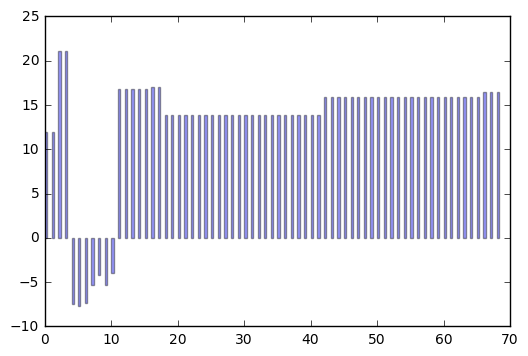

In [245]:
index = np.arange(len(regr.coef_))
bar_width = 0.35
opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, np.log(np.abs(regr.coef_)), bar_width,
                 alpha=opacity,
                 color='b',
                 error_kw=error_config,
                 label='Men')

# plt.bar(regr.coef_)
plt.show()

In [246]:
# DOUBT TO RESOLVE about PANDAS APPLY METHOD!
# df[['Tip_amount','Fare_amount']].apply(lambda x: ((x['Tip_amount']/x['Fare_amount'])*100) if (x['Fare_amount'] > 0) else np.nan )

>Question 5

>Choose only one of these options to answer for Question 5. There is no preference as to which one you choose. Please select the question that you feel your particular skills and/or expertise are best suited to. If you answer more than one, only the first will be scored.

>·         Option A: Distributions

>    Build a derived variable representing the average speed over the course of a trip.

>    Can you perform a test to determine if the average trip speeds are materially the same in all weeks of September? If you decide they are not the same, can you form a hypothesis regarding why they differ?

>    Can you build up a hypothesis of average trip speed as a function of time of day?

In [247]:
ans_t = (df['dropoff'] - df['pickup']).apply(lambda x: x.total_seconds())

Trips taking less than 60 seconds are slightly hard to be true, hence we omit these entries as they could harm our analysis. There are 23630 such entries i.e. 1.5% of the entire data, hence we can proceed after dropping this part.

In [248]:
print('Percentage of entries with travel time less than a minute: ',100 * df[ans_t < 60].shape[0]/df.shape[0],'%')

Percentage of entries with travel time less than a minute:  1.5888015668235596 %


In [249]:
df.columns

Index(['VendorID', 'lpep_pickup_datetime', 'Lpep_dropoff_datetime',
       'Store_and_fwd_flag', 'RateCodeID', 'Pickup_longitude',
       'Pickup_latitude', 'Dropoff_longitude', 'Dropoff_latitude',
       'Passenger_count', 'Trip_distance', 'Fare_amount', 'Extra', 'MTA_tax',
       'Tip_amount', 'Tolls_amount', 'Ehail_fee', 'improvement_surcharge',
       'Total_amount', 'Payment_type', 'Trip_type ', 'pickup', 'pickup_hour',
       'dropoff', 'dropoff_hour', 'airport', 'tip_percent'],
      dtype='object')

In [250]:
df['travel_time'] = (df['dropoff'] - df['pickup']).apply(lambda x: x.total_seconds()) 
df = df[df['travel_time'] > 60]
df['average_speed'] = 3600*(df['Trip_distance']/df['travel_time'])

In [251]:
df['average_speed'].plot.hist(bins=300)

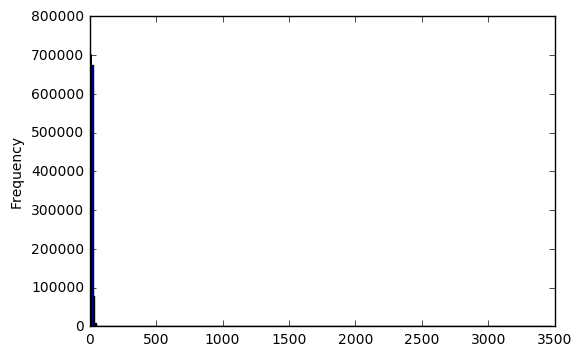

In [252]:
plt.show()

We filter away the 93 entries with over 100 miles per hour of average speed as it is unreasonable and must have been a result of some erroneous data collection process or later in the pipeline.

In [256]:
print('No of entries with average speed over 100 miles per hour: ',(df['average_speed']>200).value_counts()[1])
df = df[df['average_speed']<200]

No of entries with average speed over 100 miles per hour:  93


In [257]:
df['week'] = df['dropoff'].apply(lambda x: x.week)

/Users/akhileshgotmare/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [258]:
df['week'].value_counts()

37    356715
38    352786
39    332219
36    292139
40    130259
Name: week, dtype: int64

In [261]:
week_1 = df['average_speed'][df['week']==36].as_matrix()
week_2 = df['average_speed'][df['week']==37].as_matrix()
week_3 = df['average_speed'][df['week']==38].as_matrix()
week_4 = df['average_speed'][df['week']==39].as_matrix()
week_5 = df['average_speed'][df['week']==40].as_matrix()

In [269]:
stats.f_oneway(week_1,week_2, week_3,week_4, week_5)

F_onewayResult(statistic=1025.1988959282685, pvalue=0.0)

The ANOVA test indicates a large f-value and a small p-value, therefore we reject the null hypothesis and we conclude that the differences between the groups are statistically significant which implies that the week of the month does seem to be related to the average speed. We further compute the mean, median and histogram for these groups to support our claims

In [266]:
print(week_1.mean(),week_2.mean(),week_3.mean(),week_4.mean(),week_5.mean())

13.3832726166 12.7247318871 12.7121244122 13.1901576133 12.4727838752


In [287]:
print(statistics.median(week_1),statistics.median(week_2),statistics.median(week_3),statistics.median(week_4),
      statistics.median(week_5))

12.1321585903 11.6205016358 11.6406235986 12.0313315927 11.4256259205


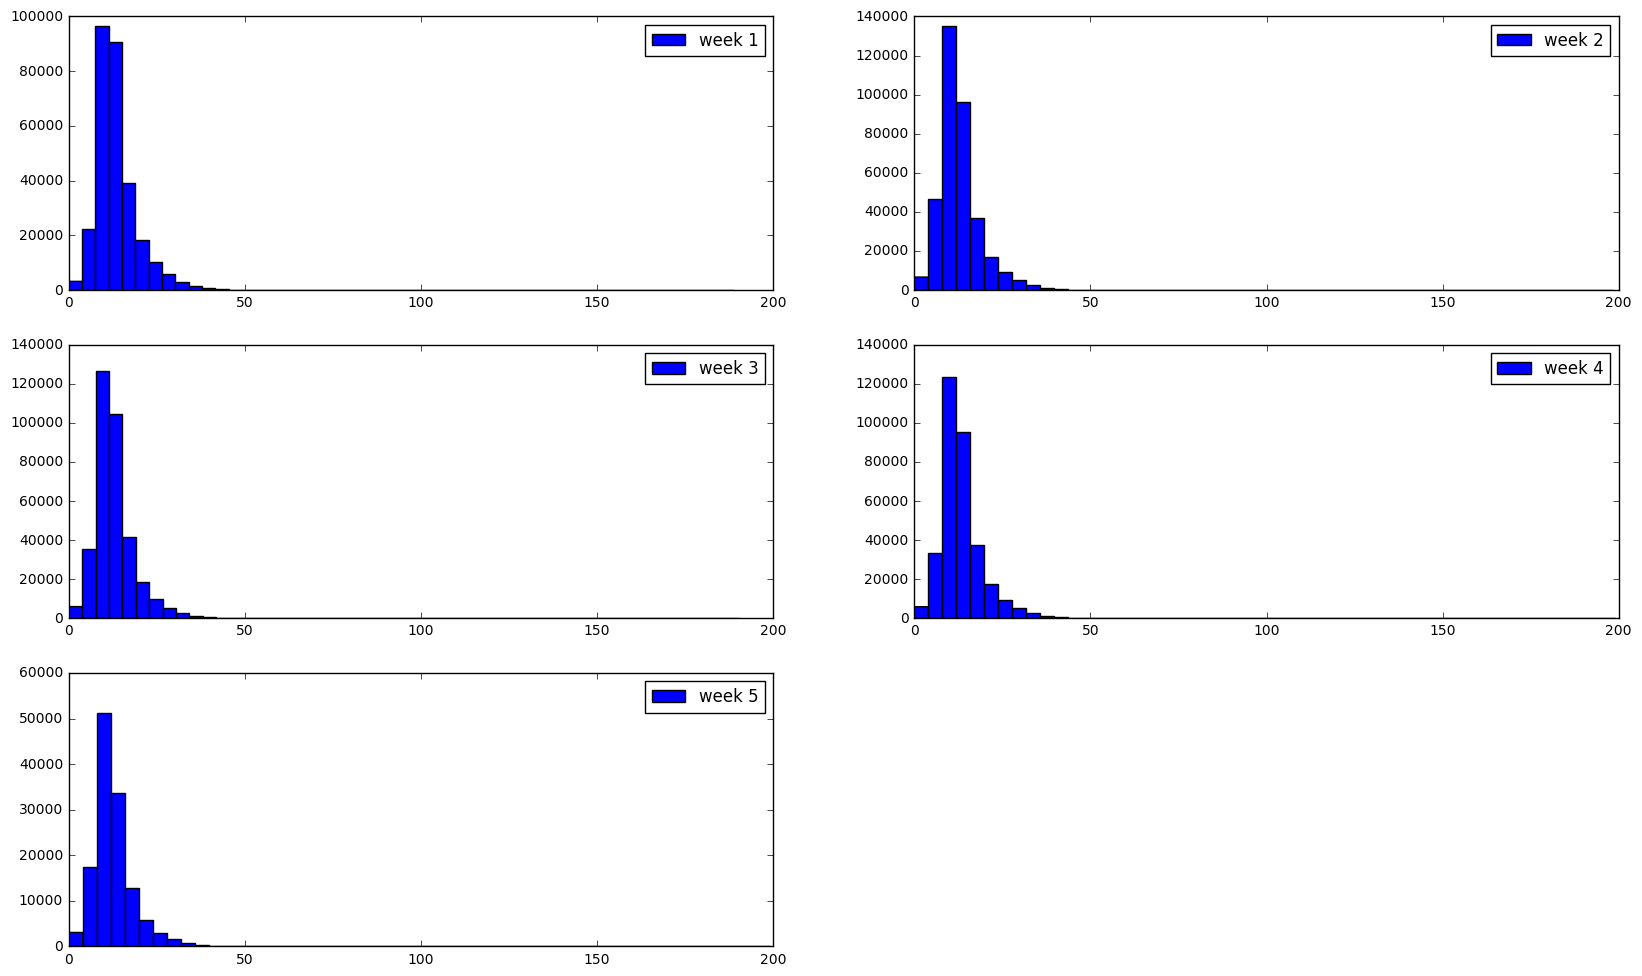

In [289]:
plt.rcParams["figure.figsize"] = [20,12]
plt.subplot(3,2,1)
plt.hist(week_1,bins = 50,label = 'week 1')
plt.legend()
plt.subplot(3,2,2)
plt.hist(week_2,bins = 50,label = 'week 2')
plt.legend()
plt.subplot(3,2,3)
plt.hist(week_3,bins = 50,label = 'week 3')
plt.legend()
plt.subplot(3,2,4)
plt.hist(week_4,bins = 50,label = 'week 4')
plt.legend()
plt.subplot(3,2,5)
plt.hist(week_5,bins = 50,label = 'week 5')
plt.legend()
plt.legend()
plt.savefig('task5')
plt.show()

# LAST CHANGE  - BABA ISKE NICHE SE COPY KR LAST PART K LIYE, UPAR KA SAB SAME HAI!

In [297]:
df.columns

Index(['VendorID', 'lpep_pickup_datetime', 'Lpep_dropoff_datetime',
       'Store_and_fwd_flag', 'RateCodeID', 'Pickup_longitude',
       'Pickup_latitude', 'Dropoff_longitude', 'Dropoff_latitude',
       'Passenger_count', 'Trip_distance', 'Fare_amount', 'Extra', 'MTA_tax',
       'Tip_amount', 'Tolls_amount', 'Ehail_fee', 'improvement_surcharge',
       'Total_amount', 'Payment_type', 'Trip_type ', 'pickup', 'pickup_hour',
       'dropoff', 'dropoff_hour', 'airport', 'tip_percent', 'travel_time',
       'average_speed', 'week'],
      dtype='object')

In [307]:
grouped = df.groupby('pickup_hour')
samples = []

for name,group in grouped:
    samples.append(group['average_speed']) 

In [309]:
sample = samples
stats.f_oneway(sample[0],sample[1],sample[2],sample[3], sample[4],sample[5],sample[6],sample[7],sample[8],sample[9],
              sample[10],sample[11],sample[12],sample[13],sample[14],sample[15],sample[16],sample[17],sample[18],
               sample[19],
              sample[20],sample[21],sample[22],sample[23])

F_onewayResult(statistic=4914.1349850891156, pvalue=0.0)

The ANOVA test for sets partitioned as per the hour of the journey also gives a high f-value and p-value of 0, implying that there are statistifically significant differences in the data sets considered.

In [316]:
means = []
medians = []
for hour in range(24):
    means.append(statistics.mean(sample[hour]))
    print('Mean:',statistics.mean(sample[hour]))
    medians.append(statistics.median(sample[hour]))
    print('Median:',statistics.median(sample[hour]))

Mean: 14.6639353139
Median: 13.4201183432
Mean: 14.9252876725
Median: 13.7319587629
Mean: 15.146889416
Median: 13.9712933175
Mean: 15.5386502123
Median: 14.2275449102
Mean: 16.3749565202
Median: 14.6666666667
Mean: 18.1430466345
Median: 16.2
Mean: 17.160749353
Median: 15.3366864653
Mean: 13.5402059607
Median: 12.0616174583
Mean: 12.3019317672
Median: 11.0204081633
Mean: 12.5924211975
Median: 11.3327171731
Mean: 12.5934777922
Median: 11.3646353646
Mean: 12.3043828557
Median: 11.1111111111
Mean: 12.1994123864
Median: 11.0284463895
Mean: 12.1070622969
Median: 10.9695290859
Mean: 11.6046705599
Median: 10.5845070423
Mean: 11.2251591641
Median: 10.3135135135
Mean: 10.9940357764
Median: 10.1758859857
Mean: 10.9614312388
Median: 10.2272727273
Mean: 11.5509198143
Median: 10.7564766839
Mean: 12.1071507273
Median: 11.2348993289
Mean: 12.7933973885
Median: 11.8255813953
Mean: 13.6661321269
Median: 12.4922106285
Mean: 14.1376122156
Median: 12.9345132743
Mean: 14.4183527668
Median: 13.2079021637


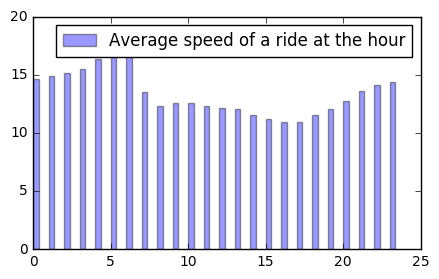

In [325]:
plt.rcParams["figure.figsize"] = [5,3]
index = np.arange(24)
bar_width = 0.35
opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, means, bar_width,
                 alpha=opacity,
                 color='b',
                 error_kw=error_config,
                 label='Average speed of a ride at the hour')
plt.legend()
plt.savefig('task_5_b_1')

plt.show()


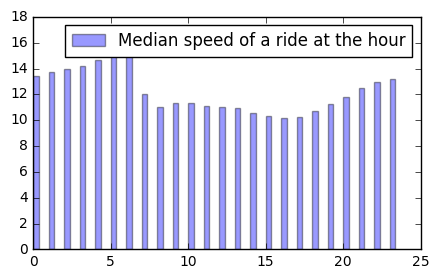

In [326]:
plt.rcParams["figure.figsize"] = [5,3]
index = np.arange(24)
bar_width = 0.35
opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, medians, bar_width,
                 alpha=opacity,
                 color='b',
                 error_kw=error_config,
                 label='Median speed of a ride at the hour')
plt.legend()
plt.savefig('task_5_b_2')

plt.show()
